# Importing 

"""

Exploring numeric data to answer research questions 

"""

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
path = r'C:\Users\Administrator\Desktop\Projects (Carrer foundry)\Achievement 6'
df= pd.read_csv(os.path.join(path, 'Data','Cleaned_data.csv'), index_col= False)

# Research questions

What is the relationship between bean type and rating?

Is there a best nation for chocolate production?

What is the best place to grow cocoa?

Is there a relationship between more recent reviews and scores?

How does amount of cocoa in the bar effect the rating?

How often are the various bean types used? What’s the most popular bean?

Is there a correlation between distance between where the beans are farmed and where the actual bar is created in the ratings?

Do bean type and percent cocoa in bar relate?


# Data exploration

In [3]:
# checking the data to make sure it came in right
df.shape

(1793, 10)

In [4]:
df.head()
"""
.head()
Return the first n rows.

This method returns the first `n` rows of the DataFrame/Series. It is useful 
for quickly inspecting a dataset.

"""

,Unnamed: 0,Company \n(Maker-if known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [5]:
df = df.drop(columns=['Unnamed: 0'])
"""
.drop()
Drop specified rows or columns.
"""
df.head()

,Company \n(Maker-if known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


## fixed the usual unnamed error when loading data

In [9]:
# creating a dataframe that can be used in a correlation table
df_corr = df[['REF','Review_Date','Cocoa_Percent','Rating']]
df_corr.head()

,REF,Review_Date,Cocoa_Percent,Rating
0,1876,2016,63.0,3.75
1,1676,2015,70.0,2.75
2,1676,2015,70.0,3.00
3,1680,2015,70.0,3.50
4,1704,2015,70.0,3.50


In [10]:
df_corr.corr()
"""
.corr()

Compute pairwise correlation of columns, excluding NA/null values.

"""

,REF,Review_Date,Cocoa_Percent,Rating
REF,1.000000,0.985085,0.037701,0.101747
Review_Date,0.985085,1.000000,0.038115,0.100332
Cocoa_Percent,0.037701,0.038115,1.000000,-0.164758
Rating,0.101747,0.100332,-0.164758,1.000000


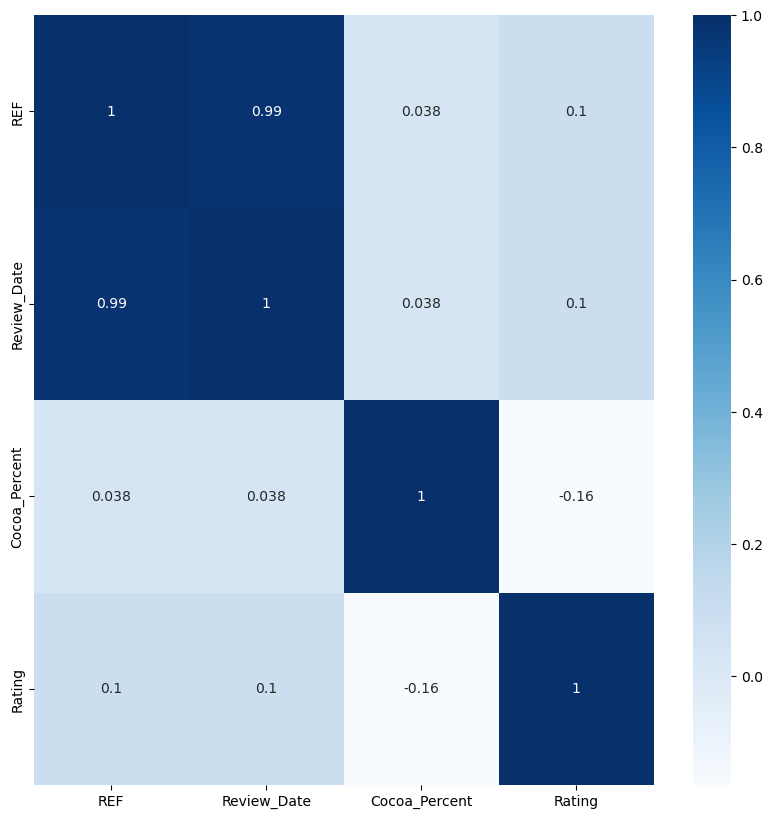

In [28]:
# Create the correlation heatmap 
plt.figure(figsize=(10,10))
corr = sns.heatmap(df_corr.corr(), cmap='Blues', annot = True, linewidths=0) 
plt.show()
"""
Plotting data in df_corr as a heatmap

.figure()
Create a new figure.

.heatmap()
Plot rectangular data as a color-encoded matrix.

.show()
Display all open figures.


"""

## Discussion of numerical correlations
so far it seems there is very weak correlation between ratings and when it was rated and cocoa percent. In general this is good for the integerty of the data as it means there isn't a recency bias or a bias for or agianist amount of cocoa in the product.

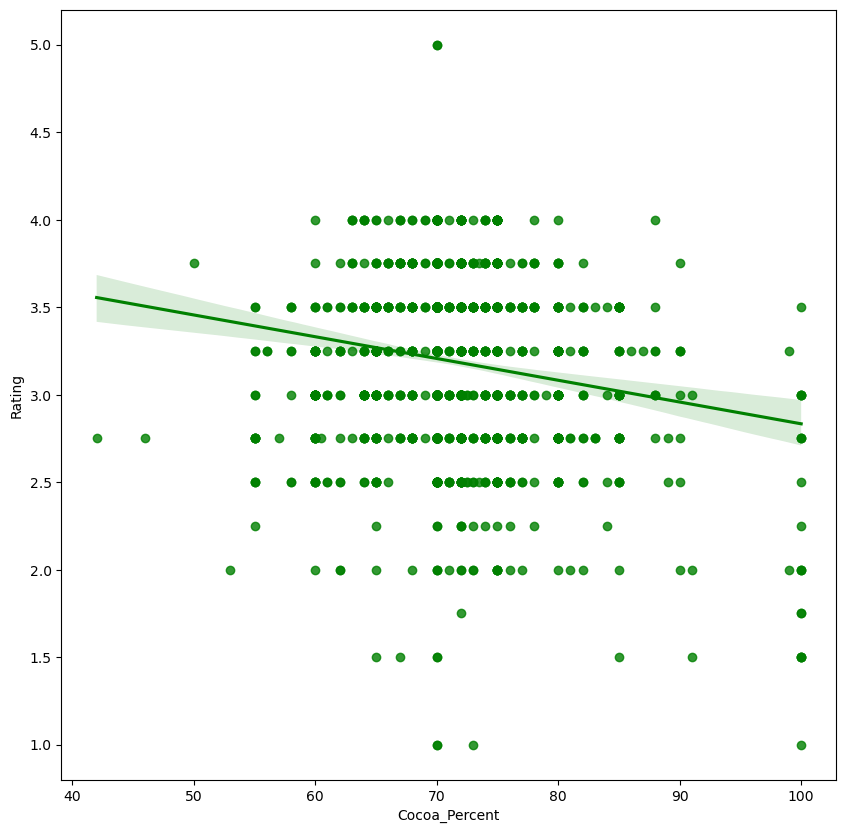

In [34]:
# the strongest correlation is still pretty weak. It's between cocoa percentage and rating
plt.figure(figsize=(10,10))
sctplt = sns.regplot(x='Cocoa_Percent', y='Rating', data=df, color = 'green')
"""
.regplot()

Plot data and a linear regression model fit.

This function combines a scatter plot with a linear regression line fit to the data. 
You can customize the appearance of the scatter plot, the regression line, 
and the confidence intervals around the regression line.

"""
plt.show()

## Discussion of scatter plot
As expected the line is almost horizontal proving only a weak negative correlation between cocoa percentage and rating. 

<Figure size 1000x1000 with 0 Axes>

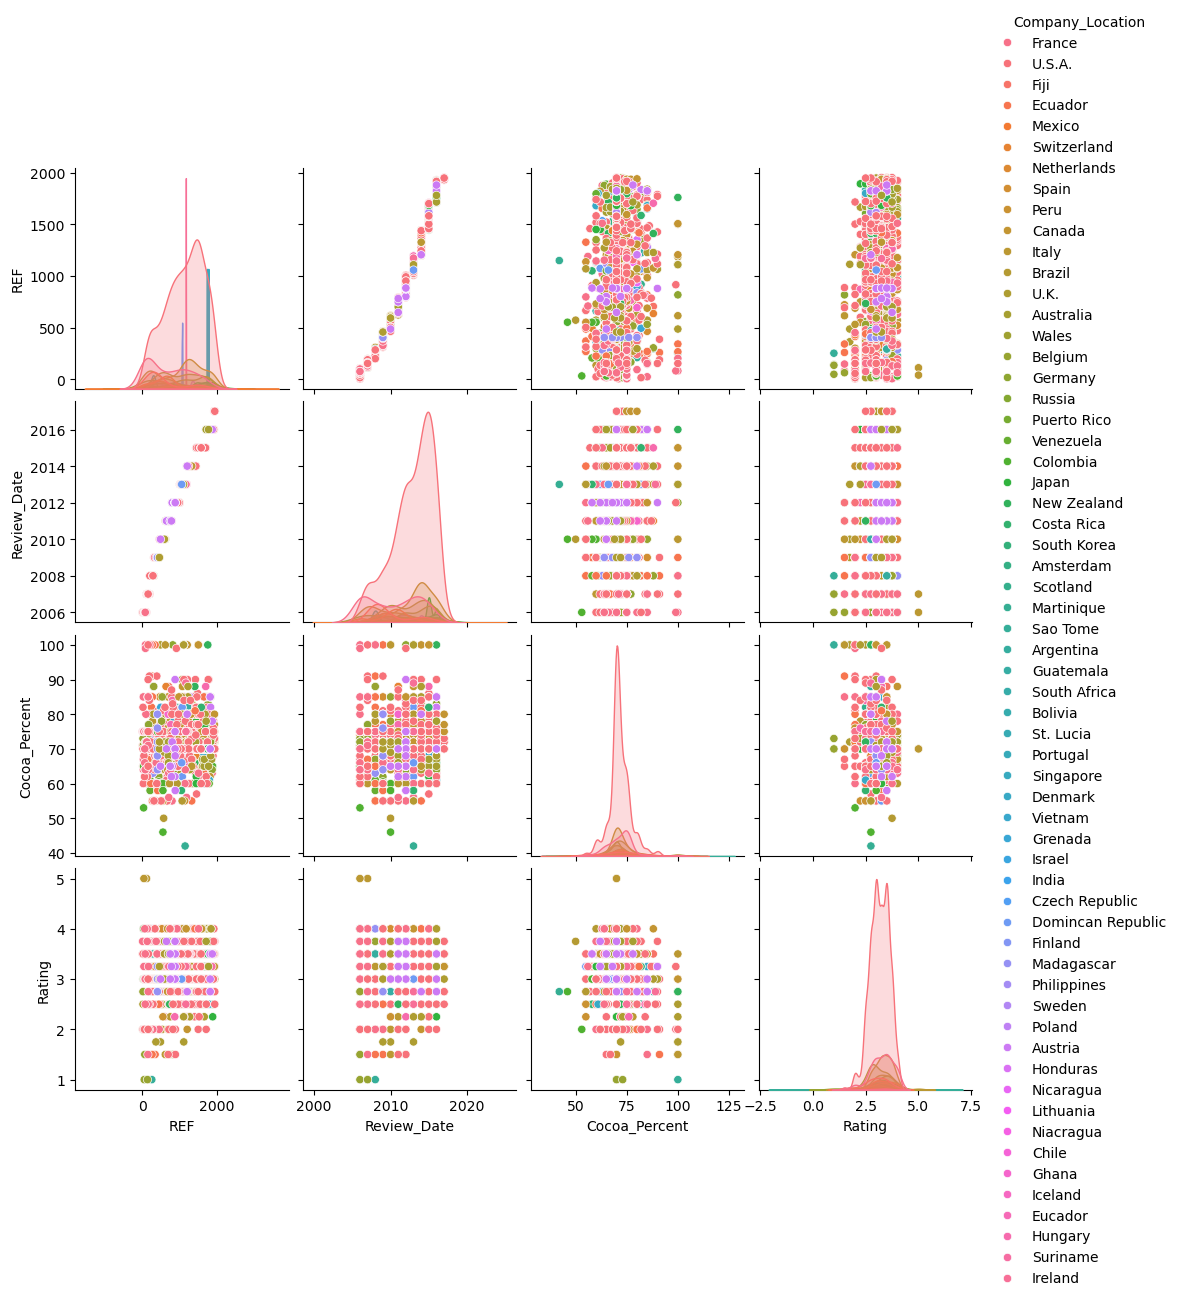

In [38]:
# creating the pair plots for the whole data set
plt.figure(figsize=(10,10))
pair = sns.pairplot(df, hue = 'Company_Location')
"""
.pairplot()

Plot pairwise relationships in a dataset.

This function plots pairwise relationships in a dataset. It generates a matrix of scatter plots for each pair of 
numerical variables, and a histogram or kernel density estimate (KDE) for the univariate distributions along the diagonal.


"""
plt.show()

## Discussion of pair plot
the original is a little dull, not really revealing much information, but by adding the company location to the hue command we can start to see some trends. Seems like a large number of chocolate comes from France, Us and Fiji. There is a bit more information here but is extremly hard to read, gives me ideas for further analysis though.

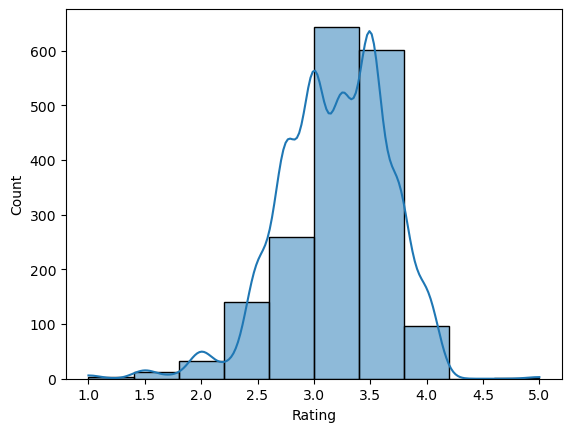

In [44]:
# creating a categorical plot for Rating, start by using a histogram to find the categories 
average_rate = sns.histplot(df['Rating'], bins = 10, kde = True)
"""
.histplot()

Plot univariate or bivariate histograms with optional normalization.

This function plots a histogram of a univariate or bivariate distribution, with optional kernel density estimation 
(KDE) or other additional functionalities.

"""

In [52]:
# creat the categories
df.loc[df['Rating'] < 3.0, 'Quality'] = 'Below Average'
df.loc[(df['Rating'] >= 3.0) & (df['Rating'] <= 3.5), 'Quality'] = 'Average'
df.loc[df['Rating'] > 3.5, 'Quality'] = 'Above Average'

"""
using loc to create a new column for quality of chocolate

.loc[]

Access a group of rows and columns by labels or a boolean array.

The `.loc[]` function is primarily label-based indexing. It allows you to select data from a DataFrame by specifying
the row and column labels. This can be used for selecting specific rows, columns, or a combination of both. You can
also pass boolean expressions to filter the data.

"""

In [53]:
df.head()

,Company \n(Maker-if known),Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Quality
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,Above Average
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,Below Average
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,Average
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,Average
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,Average


<Figure size 1000x1000 with 0 Axes>

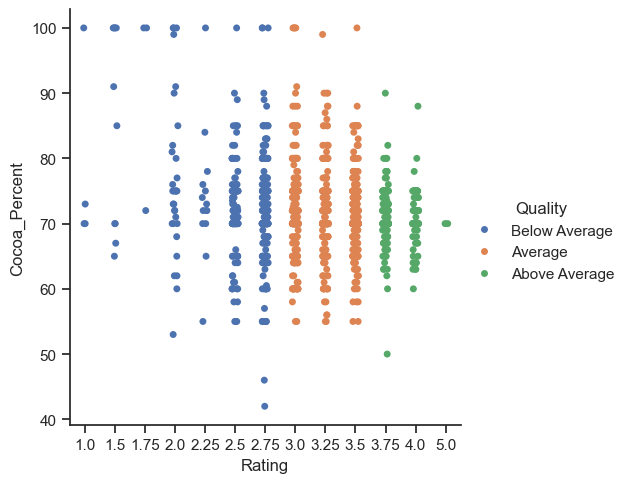

In [67]:
# creating categorical plot for Quality 
plt.figure(figsize=(10,10))
ratplot = sns.catplot(x="Rating", y="Cocoa_Percent", hue="Quality", data=df)
"""
.catplot()

FacetGrid for visualizing categorical data.

This function combines a `FacetGrid` with a categorical plot to allow the creation of a wide variety of plots with a
single call. It offers flexible and powerful tools for visualizing categorical variables. The `kind` parameter allows
the creation of various types of categorical plots (e.g., 'box', 'violin', 'strip', 'swarm', 'count', etc.).

"""
#plt.xticks(np.arange(min(df['Cocoa_Percent']), max(df['Cocoa_Percent'])+1,1))

## Discussion of categoical plot
As per the earlier analysis the quality of chocolate seems largerly independant of the amount of cocoa in the bar.

# Revisting intial questions
What is the relationship between bean type and rating? - not yet explored 

Is there a best nation for chocolate production? - not yet explored

What is the best place to grow cocoa? - not yet explored

Is there a relationship between more recent reviews and scores? - no there is not a strong relationship between recent reviews and ratings.

How does amount of cocoa in the bar effect the rating? - there is a weak negative correlation between amount of cocoa and ratings. Not enough to call a relationship

How often are the various bean types used? What’s the most popular bean?- not yet explored

Is there a correlation between distance between where the beans are farmed and where the actual bar is created in the ratings?- not yet explored

Do bean type and percent cocoa in bar relate?- not yet explored

## hypothesis
France and America will produce the most bars, but will have less above average results proportionally to other countries.

# Exporting visuals

In [70]:
 
corr.figure.savefig(os.path.join(path, 'Visuals', 'correlation.png'))
sctplt.figure.savefig(os.path.join(path, 'Visuals', 'scatter_plot.png'))
pair.figure.savefig(os.path.join(path, 'Visuals', 'pair_plot.png'))
ratplot.savefig(os.path.join(path, 'Visuals', 'Categorical_plot.png'))